### Importing Libraries

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [591]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Reading data and looking at values

In [527]:
data = pd.read_csv('heart.csv')

In [528]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [529]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Visibly, the DB does not have missing values.

In [530]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Unique values for each column

In [531]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

C:\Users\ahs467\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

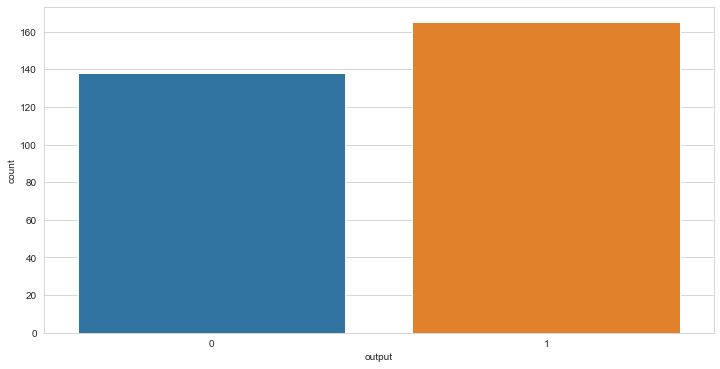

In [532]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(data['output'])

<AxesSubplot:>

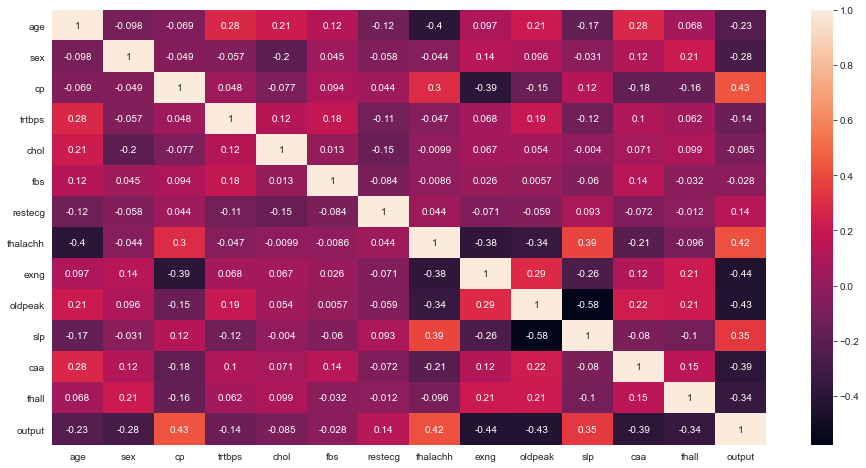

In [642]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True)

 correlation of heart attacks with chest pain and thalachh

C:\Users\ahs467\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

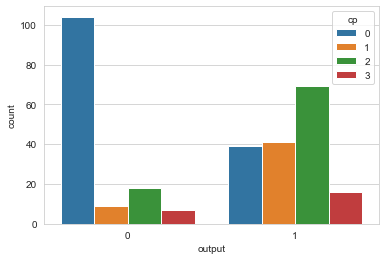

In [602]:
sns.countplot(data['output'], hue=data['cp'])

cp : Chest Pain type chest pain type

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic


High number of heart attacks when you have non-anginal pain

C:\Users\ahs467\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

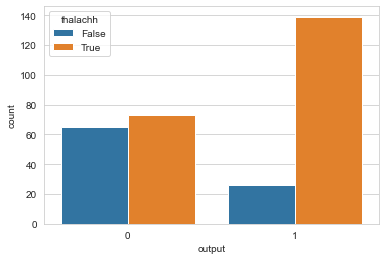

In [675]:
sns.countplot(data['output'], hue=data['thalachh']>140)

Bigger difference at maximum heart rate achieved > 140

C:\Users\ahs467\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

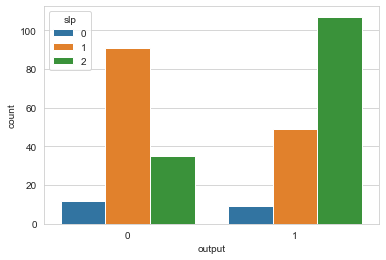

In [676]:
sns.countplot(data['output'], hue=data['slp'])

## Searching for Outliers

<AxesSubplot:ylabel='age'>

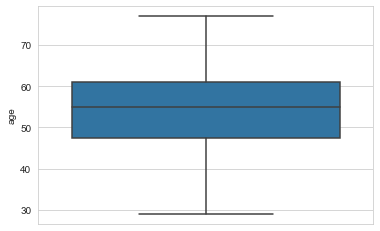

In [533]:
sns.boxplot(y=data['age'])

<AxesSubplot:ylabel='trtbps'>

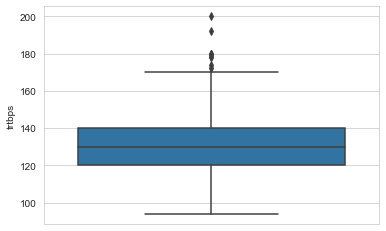

In [534]:
sns.boxplot(y=data['trtbps'])

<AxesSubplot:ylabel='chol'>

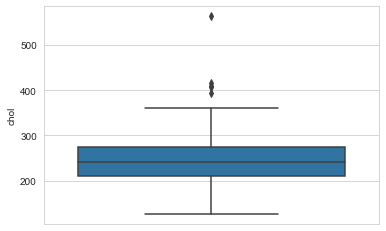

In [535]:
sns.boxplot(y=data['chol'])

<AxesSubplot:ylabel='thalachh'>

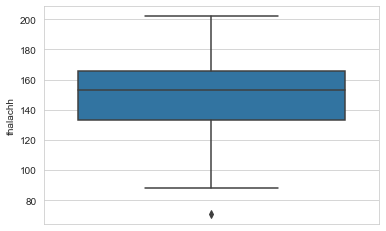

In [536]:
sns.boxplot(y=data['thalachh'])

<AxesSubplot:ylabel='oldpeak'>

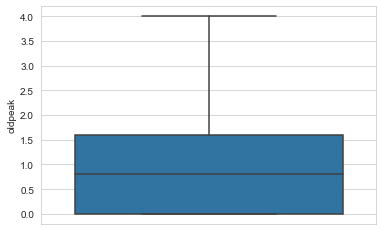

In [592]:
sns.boxplot(y=data['oldpeak'])

### Testing models with outliers and unscaled data

In [538]:
X = data.drop('output',axis=1)
y = data['output']

In [539]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [595]:
methods = [DecisionTreeClassifier, SVC, GaussianNB, KNeighborsClassifier, RandomForestClassifier]
Result_outliers_NOscaler = {}
for method in methods:
    model = method()
    model.fit(X_train,y_train)
    Result_outliers_NOscaler[model] = model.score(X_test,y_test)

### Cross Validation

In [541]:
Cross_outliers_NOscaler = {}
for method in methods:
    model = method()
    model.fit(X,y)
    Cross_outliers_NOscaler[model] = cross_val_score(model, X, y, cv=5).mean()

In [542]:
Result_outliers_NOscaler

{DecisionTreeClassifier(): 0.7368421052631579,
 SVC(): 0.5921052631578947,
 GaussianNB(): 0.7894736842105263,
 KNeighborsClassifier(): 0.5921052631578947,
 RandomForestClassifier(): 0.7631578947368421}

In [594]:
Cross_outliers_NOscaler

{DecisionTreeClassifier(): 0.7621311475409837,
 SVC(): 0.6434972677595628,
 GaussianNB(): 0.8050819672131148,
 KNeighborsClassifier(): 0.643879781420765,
 RandomForestClassifier(): 0.8184699453551912}

### Replacing outliers/inconsistent values by average values

In [544]:
data[data['trtbps']>170]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [545]:
trtbpsMean = data['trtbps'].mean()
trtbpsMean

131.62376237623764

In [546]:
data['trtbps'].replace([172,174,178,180,192,200], trtbpsMean, inplace=True)

In [547]:
data[data['trtbps']>170]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


<AxesSubplot:ylabel='trtbps'>

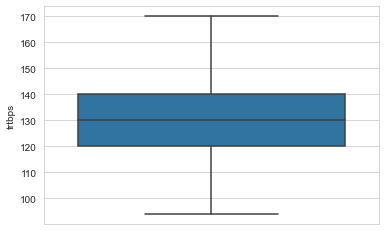

In [548]:
sns.boxplot(y=data['trtbps'])

In [549]:
data[data['chol']>390]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140.0,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115.0,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140.0,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150.0,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134.0,409,0,0,150,1,1.9,1,2,3,0


In [550]:
cholMean = data['chol'].mean()
cholMean

246.26402640264027

<AxesSubplot:ylabel='chol'>

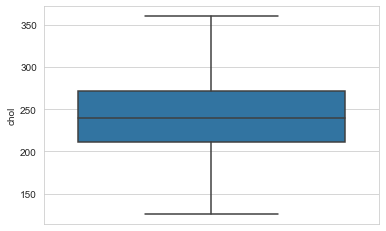

In [551]:
data['chol'].replace([394,417, 564, 407, 409], cholMean, inplace=True)
sns.boxplot(y=data['chol'])

In [552]:
data[data['thalachh']<95]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
243,57,1,0,152.0,274.0,0,1,88,1,1.2,1,1,3,0
272,67,1,0,120.0,237.0,0,1,71,0,1.0,1,0,2,0
297,59,1,0,164.0,176.0,1,0,90,0,1.0,1,2,1,0


In [553]:
thalachhMean = data['thalachh'].mean()
thalachhMean

149.64686468646866

In [554]:
data['thalachh'].replace([71,88, 90], thalachhMean, inplace=True)

C:\Users\ahs467\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalachh'>

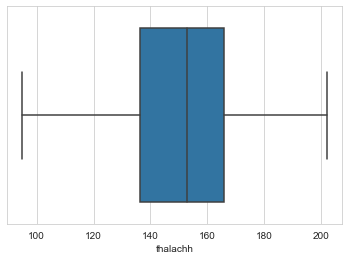

In [555]:
sns.boxplot(data['thalachh'])

In [556]:
data[data['oldpeak']>4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
101,59,1,3,131.623762,270.0,0,0,145.0,0,4.2,0,0,3,1
204,62,0,0,160.000000,164.0,0,0,145.0,0,6.2,0,3,3,0
221,55,1,0,140.000000,217.0,0,1,111.0,1,5.6,0,0,3,0
250,51,1,0,140.000000,298.0,0,1,122.0,1,4.2,1,3,3,0
291,58,1,0,114.000000,318.0,0,2,140.0,0,4.4,0,3,1,0


In [557]:
oldpeakMean = data['oldpeak'].mean()
oldpeakMean

1.0396039603960396

In [558]:
data['oldpeak'].replace([4.2,6.2,5.6,4.2,4.4], 1.0, inplace=True)

<AxesSubplot:ylabel='oldpeak'>

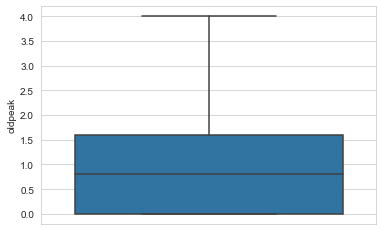

In [559]:
sns.boxplot(y=data['oldpeak'])

C:\Users\ahs467\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak', ylabel='count'>

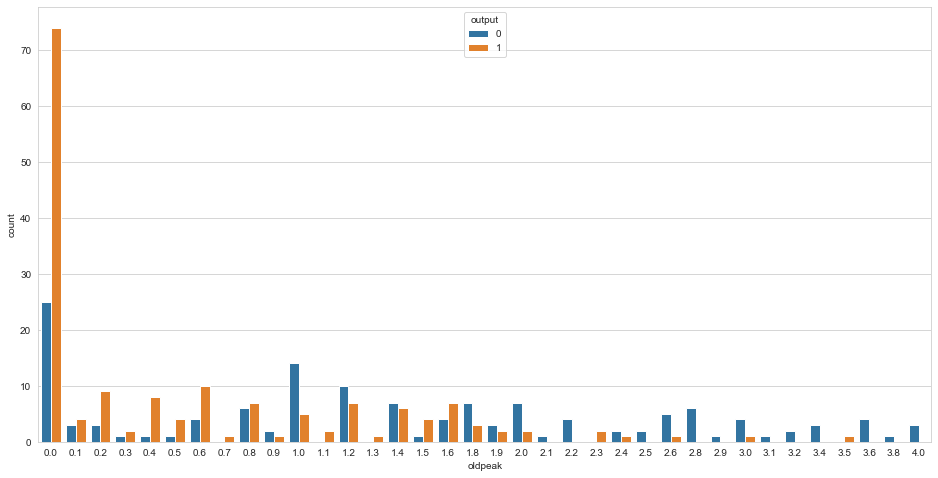

In [560]:
plt.figure(figsize=(16,8))
sns.countplot(data['oldpeak'], hue=data['output'])

oldpeak: ST depression induced by exercise relative to rest

Low levels of oldpeak tend to have more heart attacks than high levels

C:\Users\ahs467\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


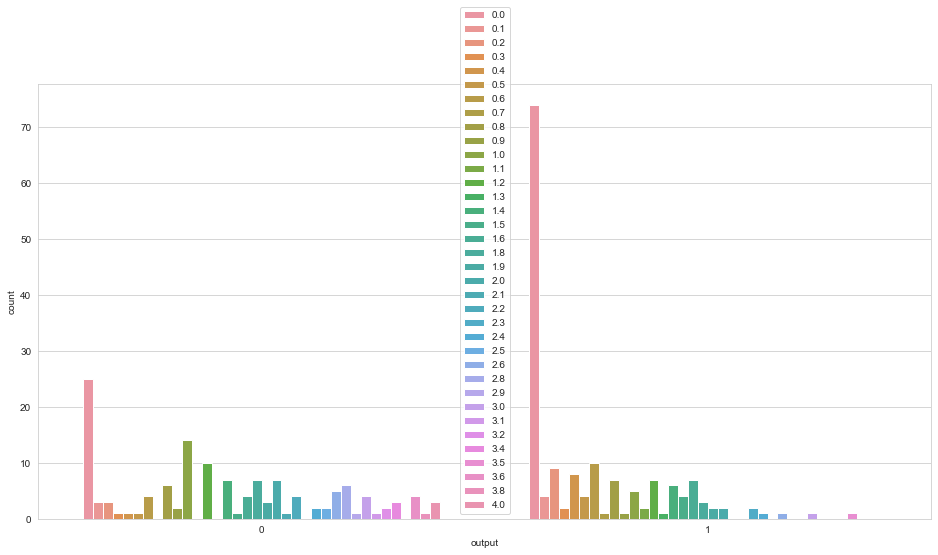

In [561]:
plt.figure(figsize=(16,8))
sns.countplot(data['output'], hue=data['oldpeak'])
plt.legend()

C:\Users\ahs467\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='count'>

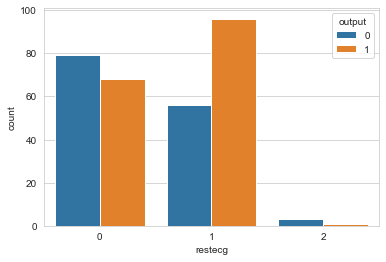

In [562]:
sns.countplot(data['restecg'], hue=data['output'])

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

Value 1 tend to have more heart attack than others.

C:\Users\ahs467\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol', ylabel='count'>

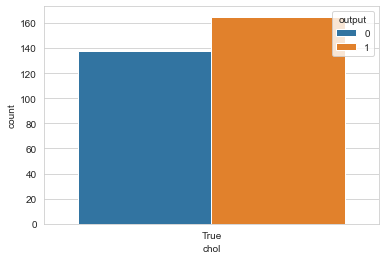

In [563]:
sns.countplot(data['chol']>120, hue=data['output'])

Little more heart attacks for cholestoral above 120 mg/dl 

## Testing Models after replacing outliers, data still unscaled

In [564]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [565]:
methods = [DecisionTreeClassifier, SVC, GaussianNB, KNeighborsClassifier, RandomForestClassifier]
Results_NOoutliers_NOscaler = {}
for method in methods:
    model = method()
    model.fit(X_train,y_train)
    Results_NOoutliers_NOscaler[model] = model.score(X_test,y_test)

### Cross Validation

In [566]:
Cross_NOoutliers_NOscaler = {}
for method in methods:
    model = method()
    Cross_NOoutliers_NOscaler[model] = cross_val_score(model, X, y, cv=5).mean()

In [567]:
Results_NOoutliers_NOscaler

{DecisionTreeClassifier(): 0.7105263157894737,
 SVC(): 0.5921052631578947,
 GaussianNB(): 0.7894736842105263,
 KNeighborsClassifier(): 0.5921052631578947,
 RandomForestClassifier(): 0.7236842105263158}

In [568]:
Cross_NOoutliers_NOscaler

{DecisionTreeClassifier(): 0.7555191256830602,
 SVC(): 0.6434972677595628,
 GaussianNB(): 0.8050819672131148,
 KNeighborsClassifier(): 0.643879781420765,
 RandomForestClassifier(): 0.8314754098360657}

Naive Bayes and Random Forest seems to have the best result in this condition

## Scaling data

In [569]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [570]:
X = SS.fit_transform(X)
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [571]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [572]:
methods = [DecisionTreeClassifier, SVC, GaussianNB, KNeighborsClassifier, RandomForestClassifier]
Results_NOoutliers_scaled = {}
for method in methods:
    model = method()
    model.fit(X_train,y_train)
    Results_NOoutliers_scaled[model] = model.score(X_test,y_test)

### Cross Validation

In [573]:
Cross_NOoutliers_scaled = {}
for method in methods:
    model = method()
    Cross_NOoutliers_scaled[model] = cross_val_score(model, X, y, cv=5).mean()

In [574]:
Results_NOoutliers_scaled

{DecisionTreeClassifier(): 0.7105263157894737,
 SVC(): 0.8026315789473685,
 GaussianNB(): 0.7894736842105263,
 KNeighborsClassifier(): 0.75,
 RandomForestClassifier(): 0.7631578947368421}

In [575]:
Cross_NOoutliers_scaled

{DecisionTreeClassifier(): 0.7686885245901639,
 SVC(): 0.8182513661202184,
 GaussianNB(): 0.8050819672131148,
 KNeighborsClassifier(): 0.8118579234972678,
 RandomForestClassifier(): 0.821639344262295}

### We can see better results in all models with scaled data. Now let's test the data on neural networks

## Setup size of hidden layers

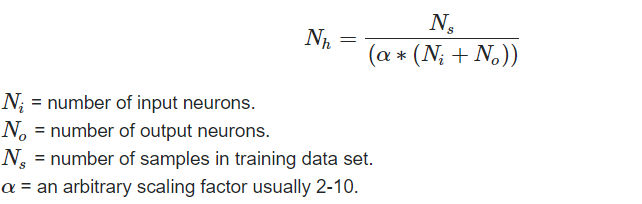
Alpha selected = 2

In [589]:
MLP = MLPClassifier(hidden_layer_sizes=(8,8), verbose=True, max_iter=2000, random_state=1)
MLP.fit(X_train,y_train)
MLP.score(X_test,y_test)

Iteration 1, loss = 0.70729506
Iteration 2, loss = 0.70312093
Iteration 3, loss = 0.69960492
Iteration 4, loss = 0.69594730
Iteration 5, loss = 0.69238736
Iteration 6, loss = 0.68886331
Iteration 7, loss = 0.68529594
Iteration 8, loss = 0.68173109
Iteration 9, loss = 0.67846962
Iteration 10, loss = 0.67508736
Iteration 11, loss = 0.67178886
Iteration 12, loss = 0.66848550
Iteration 13, loss = 0.66516027
Iteration 14, loss = 0.66193511
Iteration 15, loss = 0.65867272
Iteration 16, loss = 0.65554789
Iteration 17, loss = 0.65231910
Iteration 18, loss = 0.64939892
Iteration 19, loss = 0.64629893
Iteration 20, loss = 0.64317135
Iteration 21, loss = 0.64016156
Iteration 22, loss = 0.63715523
Iteration 23, loss = 0.63414945
Iteration 24, loss = 0.63117123
Iteration 25, loss = 0.62839983
Iteration 26, loss = 0.62545590
Iteration 27, loss = 0.62272756
Iteration 28, loss = 0.61991464
Iteration 29, loss = 0.61719448
Iteration 30, loss = 0.61428007
Iteration 31, loss = 0.61165072
Iteration 32, los

Iteration 295, loss = 0.25816266
Iteration 296, loss = 0.25759190
Iteration 297, loss = 0.25703166
Iteration 298, loss = 0.25643936
Iteration 299, loss = 0.25581782
Iteration 300, loss = 0.25523392
Iteration 301, loss = 0.25471029
Iteration 302, loss = 0.25411106
Iteration 303, loss = 0.25360434
Iteration 304, loss = 0.25311377
Iteration 305, loss = 0.25259972
Iteration 306, loss = 0.25210774
Iteration 307, loss = 0.25161661
Iteration 308, loss = 0.25115590
Iteration 309, loss = 0.25060902
Iteration 310, loss = 0.25014709
Iteration 311, loss = 0.24951555
Iteration 312, loss = 0.24906100
Iteration 313, loss = 0.24864004
Iteration 314, loss = 0.24801398
Iteration 315, loss = 0.24752184
Iteration 316, loss = 0.24692539
Iteration 317, loss = 0.24640483
Iteration 318, loss = 0.24581523
Iteration 319, loss = 0.24534856
Iteration 320, loss = 0.24474315
Iteration 321, loss = 0.24423192
Iteration 322, loss = 0.24362080
Iteration 323, loss = 0.24314832
Iteration 324, loss = 0.24255356
Iteration 

Iteration 620, loss = 0.15620621
Iteration 621, loss = 0.15582215
Iteration 622, loss = 0.15559070
Iteration 623, loss = 0.15550125
Iteration 624, loss = 0.15540872
Iteration 625, loss = 0.15526672
Iteration 626, loss = 0.15516370
Iteration 627, loss = 0.15501400
Iteration 628, loss = 0.15486286
Iteration 629, loss = 0.15466322
Iteration 630, loss = 0.15445765
Iteration 631, loss = 0.15425976
Iteration 632, loss = 0.15415680
Iteration 633, loss = 0.15393082
Iteration 634, loss = 0.15376556
Iteration 635, loss = 0.15363104
Iteration 636, loss = 0.15338798
Iteration 637, loss = 0.15319723
Iteration 638, loss = 0.15297901
Iteration 639, loss = 0.15272794
Iteration 640, loss = 0.15259192
Iteration 641, loss = 0.15253263
Iteration 642, loss = 0.15235704
Iteration 643, loss = 0.15225720
Iteration 644, loss = 0.15214573
Iteration 645, loss = 0.15204514
Iteration 646, loss = 0.15184157
Iteration 647, loss = 0.15167124
Iteration 648, loss = 0.15146102
Iteration 649, loss = 0.15154549
Iteration 

Iteration 938, loss = 0.09846290
Iteration 939, loss = 0.09831063
Iteration 940, loss = 0.09820872
Iteration 941, loss = 0.09793624
Iteration 942, loss = 0.09767619
Iteration 943, loss = 0.09746013
Iteration 944, loss = 0.09714280
Iteration 945, loss = 0.09687565
Iteration 946, loss = 0.09682076
Iteration 947, loss = 0.09658149
Iteration 948, loss = 0.09641946
Iteration 949, loss = 0.09630874
Iteration 950, loss = 0.09614327
Iteration 951, loss = 0.09602708
Iteration 952, loss = 0.09580572
Iteration 953, loss = 0.09547318
Iteration 954, loss = 0.09520216
Iteration 955, loss = 0.09492264
Iteration 956, loss = 0.09480430
Iteration 957, loss = 0.09483034
Iteration 958, loss = 0.09484391
Iteration 959, loss = 0.09493541
Iteration 960, loss = 0.09496194
Iteration 961, loss = 0.09483140
Iteration 962, loss = 0.09462477
Iteration 963, loss = 0.09434057
Iteration 964, loss = 0.09411742
Iteration 965, loss = 0.09396964
Iteration 966, loss = 0.09381238
Iteration 967, loss = 0.09372795
Iteration 

Iteration 1273, loss = 0.05269373
Iteration 1274, loss = 0.05261911
Iteration 1275, loss = 0.05257248
Iteration 1276, loss = 0.05257189
Iteration 1277, loss = 0.05240352
Iteration 1278, loss = 0.05217582
Iteration 1279, loss = 0.05205553
Iteration 1280, loss = 0.05187679
Iteration 1281, loss = 0.05173456
Iteration 1282, loss = 0.05162011
Iteration 1283, loss = 0.05152325
Iteration 1284, loss = 0.05136399
Iteration 1285, loss = 0.05124209
Iteration 1286, loss = 0.05114112
Iteration 1287, loss = 0.05099071
Iteration 1288, loss = 0.05082572
Iteration 1289, loss = 0.05072440
Iteration 1290, loss = 0.05057959
Iteration 1291, loss = 0.05046457
Iteration 1292, loss = 0.05038178
Iteration 1293, loss = 0.05028311
Iteration 1294, loss = 0.05016172
Iteration 1295, loss = 0.05006983
Iteration 1296, loss = 0.05001096
Iteration 1297, loss = 0.04988513
Iteration 1298, loss = 0.04980162
Iteration 1299, loss = 0.04966649
Iteration 1300, loss = 0.04955833
Iteration 1301, loss = 0.04946559
Iteration 1302

0.75

In [584]:
MLP = MLPClassifier(hidden_layer_sizes=(8,8), verbose=True, max_iter=2000)
Cross_NOoutliers_scaled[MLP] = cross_val_score(MLP, X, y, cv=5).mean()

Iteration 1, loss = 0.68947722
Iteration 2, loss = 0.68517411
Iteration 3, loss = 0.68117187
Iteration 4, loss = 0.67734284
Iteration 5, loss = 0.67369919
Iteration 6, loss = 0.67007011
Iteration 7, loss = 0.66645928
Iteration 8, loss = 0.66307645
Iteration 9, loss = 0.65975397
Iteration 10, loss = 0.65637751
Iteration 11, loss = 0.65312296
Iteration 12, loss = 0.64985192
Iteration 13, loss = 0.64658346
Iteration 14, loss = 0.64319112
Iteration 15, loss = 0.63991027
Iteration 16, loss = 0.63658005
Iteration 17, loss = 0.63316580
Iteration 18, loss = 0.63002338
Iteration 19, loss = 0.62677119
Iteration 20, loss = 0.62358165
Iteration 21, loss = 0.62056879
Iteration 22, loss = 0.61749402
Iteration 23, loss = 0.61445939
Iteration 24, loss = 0.61142245
Iteration 25, loss = 0.60849092
Iteration 26, loss = 0.60544396
Iteration 27, loss = 0.60235779
Iteration 28, loss = 0.59940545
Iteration 29, loss = 0.59643543
Iteration 30, loss = 0.59329693
Iteration 31, loss = 0.59039157
Iteration 32, los

Iteration 286, loss = 0.27432514
Iteration 287, loss = 0.27393086
Iteration 288, loss = 0.27358507
Iteration 289, loss = 0.27325837
Iteration 290, loss = 0.27291842
Iteration 291, loss = 0.27256161
Iteration 292, loss = 0.27218620
Iteration 293, loss = 0.27172747
Iteration 294, loss = 0.27134869
Iteration 295, loss = 0.27091711
Iteration 296, loss = 0.27053732
Iteration 297, loss = 0.27014251
Iteration 298, loss = 0.26981581
Iteration 299, loss = 0.26937116
Iteration 300, loss = 0.26904510
Iteration 301, loss = 0.26865363
Iteration 302, loss = 0.26820242
Iteration 303, loss = 0.26787790
Iteration 304, loss = 0.26751849
Iteration 305, loss = 0.26723632
Iteration 306, loss = 0.26697082
Iteration 307, loss = 0.26661653
Iteration 308, loss = 0.26626883
Iteration 309, loss = 0.26584246
Iteration 310, loss = 0.26545806
Iteration 311, loss = 0.26507994
Iteration 312, loss = 0.26473345
Iteration 313, loss = 0.26430917
Iteration 314, loss = 0.26391897
Iteration 315, loss = 0.26353191
Iteration 

Iteration 623, loss = 0.17875573
Iteration 624, loss = 0.17853176
Iteration 625, loss = 0.17835462
Iteration 626, loss = 0.17812612
Iteration 627, loss = 0.17791340
Iteration 628, loss = 0.17764496
Iteration 629, loss = 0.17741036
Iteration 630, loss = 0.17722774
Iteration 631, loss = 0.17702545
Iteration 632, loss = 0.17680058
Iteration 633, loss = 0.17662446
Iteration 634, loss = 0.17643185
Iteration 635, loss = 0.17623888
Iteration 636, loss = 0.17604928
Iteration 637, loss = 0.17588325
Iteration 638, loss = 0.17557512
Iteration 639, loss = 0.17527781
Iteration 640, loss = 0.17492691
Iteration 641, loss = 0.17472226
Iteration 642, loss = 0.17441687
Iteration 643, loss = 0.17415997
Iteration 644, loss = 0.17392362
Iteration 645, loss = 0.17368236
Iteration 646, loss = 0.17338918
Iteration 647, loss = 0.17309202
Iteration 648, loss = 0.17281296
Iteration 649, loss = 0.17266686
Iteration 650, loss = 0.17234593
Iteration 651, loss = 0.17214419
Iteration 652, loss = 0.17191403
Iteration 

Iteration 916, loss = 0.11565206
Iteration 917, loss = 0.11544137
Iteration 918, loss = 0.11511492
Iteration 919, loss = 0.11474957
Iteration 920, loss = 0.11450888
Iteration 921, loss = 0.11421035
Iteration 922, loss = 0.11401980
Iteration 923, loss = 0.11375444
Iteration 924, loss = 0.11352066
Iteration 925, loss = 0.11327989
Iteration 926, loss = 0.11306998
Iteration 927, loss = 0.11278590
Iteration 928, loss = 0.11257317
Iteration 929, loss = 0.11232659
Iteration 930, loss = 0.11202805
Iteration 931, loss = 0.11176874
Iteration 932, loss = 0.11143720
Iteration 933, loss = 0.11121129
Iteration 934, loss = 0.11092553
Iteration 935, loss = 0.11066655
Iteration 936, loss = 0.11041553
Iteration 937, loss = 0.11015245
Iteration 938, loss = 0.10995433
Iteration 939, loss = 0.10975825
Iteration 940, loss = 0.10969858
Iteration 941, loss = 0.10944971
Iteration 942, loss = 0.10917754
Iteration 943, loss = 0.10888093
Iteration 944, loss = 0.10852468
Iteration 945, loss = 0.10821070
Iteration 

Iteration 1165, loss = 0.06897069
Iteration 1166, loss = 0.06883812
Iteration 1167, loss = 0.06871002
Iteration 1168, loss = 0.06860804
Iteration 1169, loss = 0.06851463
Iteration 1170, loss = 0.06838966
Iteration 1171, loss = 0.06825953
Iteration 1172, loss = 0.06818146
Iteration 1173, loss = 0.06804801
Iteration 1174, loss = 0.06795195
Iteration 1175, loss = 0.06789345
Iteration 1176, loss = 0.06780898
Iteration 1177, loss = 0.06770969
Iteration 1178, loss = 0.06762930
Iteration 1179, loss = 0.06760563
Iteration 1180, loss = 0.06738343
Iteration 1181, loss = 0.06727601
Iteration 1182, loss = 0.06719128
Iteration 1183, loss = 0.06709276
Iteration 1184, loss = 0.06697402
Iteration 1185, loss = 0.06679627
Iteration 1186, loss = 0.06670126
Iteration 1187, loss = 0.06661246
Iteration 1188, loss = 0.06650050
Iteration 1189, loss = 0.06647866
Iteration 1190, loss = 0.06636347
Iteration 1191, loss = 0.06625039
Iteration 1192, loss = 0.06608362
Iteration 1193, loss = 0.06597095
Iteration 1194

Iteration 116, loss = 0.37441586
Iteration 117, loss = 0.37361486
Iteration 118, loss = 0.37281962
Iteration 119, loss = 0.37213628
Iteration 120, loss = 0.37136781
Iteration 121, loss = 0.37066720
Iteration 122, loss = 0.36998698
Iteration 123, loss = 0.36913335
Iteration 124, loss = 0.36850305
Iteration 125, loss = 0.36782778
Iteration 126, loss = 0.36714858
Iteration 127, loss = 0.36645495
Iteration 128, loss = 0.36577958
Iteration 129, loss = 0.36506358
Iteration 130, loss = 0.36451133
Iteration 131, loss = 0.36379824
Iteration 132, loss = 0.36318487
Iteration 133, loss = 0.36255166
Iteration 134, loss = 0.36198040
Iteration 135, loss = 0.36129411
Iteration 136, loss = 0.36073425
Iteration 137, loss = 0.36011406
Iteration 138, loss = 0.35946666
Iteration 139, loss = 0.35890295
Iteration 140, loss = 0.35832233
Iteration 141, loss = 0.35766572
Iteration 142, loss = 0.35704308
Iteration 143, loss = 0.35643949
Iteration 144, loss = 0.35588451
Iteration 145, loss = 0.35526580
Iteration 

Iteration 440, loss = 0.23604184
Iteration 441, loss = 0.23564988
Iteration 442, loss = 0.23533034
Iteration 443, loss = 0.23495738
Iteration 444, loss = 0.23463761
Iteration 445, loss = 0.23430922
Iteration 446, loss = 0.23400322
Iteration 447, loss = 0.23365384
Iteration 448, loss = 0.23332503
Iteration 449, loss = 0.23302838
Iteration 450, loss = 0.23270909
Iteration 451, loss = 0.23234472
Iteration 452, loss = 0.23208774
Iteration 453, loss = 0.23178890
Iteration 454, loss = 0.23149300
Iteration 455, loss = 0.23118781
Iteration 456, loss = 0.23088571
Iteration 457, loss = 0.23055513
Iteration 458, loss = 0.23021323
Iteration 459, loss = 0.22993334
Iteration 460, loss = 0.22954912
Iteration 461, loss = 0.22925761
Iteration 462, loss = 0.22893009
Iteration 463, loss = 0.22860046
Iteration 464, loss = 0.22824669
Iteration 465, loss = 0.22807998
Iteration 466, loss = 0.22768160
Iteration 467, loss = 0.22735052
Iteration 468, loss = 0.22703150
Iteration 469, loss = 0.22669459
Iteration 

Iteration 772, loss = 0.14125091
Iteration 773, loss = 0.14104141
Iteration 774, loss = 0.14087641
Iteration 775, loss = 0.14065105
Iteration 776, loss = 0.14043763
Iteration 777, loss = 0.14027002
Iteration 778, loss = 0.14009400
Iteration 779, loss = 0.13986827
Iteration 780, loss = 0.13957729
Iteration 781, loss = 0.13934763
Iteration 782, loss = 0.13911691
Iteration 783, loss = 0.13892354
Iteration 784, loss = 0.13882498
Iteration 785, loss = 0.13847223
Iteration 786, loss = 0.13826366
Iteration 787, loss = 0.13813215
Iteration 788, loss = 0.13793104
Iteration 789, loss = 0.13773112
Iteration 790, loss = 0.13755260
Iteration 791, loss = 0.13739066
Iteration 792, loss = 0.13724429
Iteration 793, loss = 0.13705871
Iteration 794, loss = 0.13679455
Iteration 795, loss = 0.13661126
Iteration 796, loss = 0.13628258
Iteration 797, loss = 0.13617257
Iteration 798, loss = 0.13595730
Iteration 799, loss = 0.13579441
Iteration 800, loss = 0.13558064
Iteration 801, loss = 0.13536846
Iteration 

Iteration 1107, loss = 0.08865836
Iteration 1108, loss = 0.08855242
Iteration 1109, loss = 0.08847395
Iteration 1110, loss = 0.08837623
Iteration 1111, loss = 0.08824992
Iteration 1112, loss = 0.08809015
Iteration 1113, loss = 0.08797636
Iteration 1114, loss = 0.08787383
Iteration 1115, loss = 0.08785869
Iteration 1116, loss = 0.08775214
Iteration 1117, loss = 0.08760385
Iteration 1118, loss = 0.08743404
Iteration 1119, loss = 0.08730276
Iteration 1120, loss = 0.08720164
Iteration 1121, loss = 0.08712677
Iteration 1122, loss = 0.08701780
Iteration 1123, loss = 0.08689959
Iteration 1124, loss = 0.08678488
Iteration 1125, loss = 0.08662075
Iteration 1126, loss = 0.08653178
Iteration 1127, loss = 0.08645894
Iteration 1128, loss = 0.08637724
Iteration 1129, loss = 0.08628315
Iteration 1130, loss = 0.08618053
Iteration 1131, loss = 0.08608944
Iteration 1132, loss = 0.08604517
Iteration 1133, loss = 0.08575910
Iteration 1134, loss = 0.08558152
Iteration 1135, loss = 0.08541259
Iteration 1136

Iteration 1444, loss = 0.05714599
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73557092
Iteration 2, loss = 0.72913858
Iteration 3, loss = 0.72388639
Iteration 4, loss = 0.71804902
Iteration 5, loss = 0.71291916
Iteration 6, loss = 0.70756100
Iteration 7, loss = 0.70286467
Iteration 8, loss = 0.69806890
Iteration 9, loss = 0.69352731
Iteration 10, loss = 0.68932057
Iteration 11, loss = 0.68507994
Iteration 12, loss = 0.68118883
Iteration 13, loss = 0.67736779
Iteration 14, loss = 0.67362318
Iteration 15, loss = 0.66993721
Iteration 16, loss = 0.66643974
Iteration 17, loss = 0.66285346
Iteration 18, loss = 0.65935206
Iteration 19, loss = 0.65599522
Iteration 20, loss = 0.65264157
Iteration 21, loss = 0.64932301
Iteration 22, loss = 0.64594393
Iteration 23, loss = 0.64272154
Iteration 24, loss = 0.63969024
Iteration 25, loss = 0.63647669
Iteration 26, loss = 0.63329610
Iteration 27, loss = 0.63036153
Iteration 28, loss = 

Iteration 333, loss = 0.27707181
Iteration 334, loss = 0.27685866
Iteration 335, loss = 0.27662268
Iteration 336, loss = 0.27640810
Iteration 337, loss = 0.27619494
Iteration 338, loss = 0.27602028
Iteration 339, loss = 0.27573380
Iteration 340, loss = 0.27550235
Iteration 341, loss = 0.27528625
Iteration 342, loss = 0.27503952
Iteration 343, loss = 0.27479595
Iteration 344, loss = 0.27458925
Iteration 345, loss = 0.27433320
Iteration 346, loss = 0.27409838
Iteration 347, loss = 0.27390978
Iteration 348, loss = 0.27364755
Iteration 349, loss = 0.27343533
Iteration 350, loss = 0.27317873
Iteration 351, loss = 0.27293481
Iteration 352, loss = 0.27278292
Iteration 353, loss = 0.27258573
Iteration 354, loss = 0.27235219
Iteration 355, loss = 0.27211958
Iteration 356, loss = 0.27192403
Iteration 357, loss = 0.27172842
Iteration 358, loss = 0.27147781
Iteration 359, loss = 0.27130779
Iteration 360, loss = 0.27103191
Iteration 361, loss = 0.27078653
Iteration 362, loss = 0.27060738
Iteration 

Iteration 662, loss = 0.21977146
Iteration 663, loss = 0.21962778
Iteration 664, loss = 0.21948449
Iteration 665, loss = 0.21926346
Iteration 666, loss = 0.21897033
Iteration 667, loss = 0.21880529
Iteration 668, loss = 0.21853472
Iteration 669, loss = 0.21839384
Iteration 670, loss = 0.21822341
Iteration 671, loss = 0.21804652
Iteration 672, loss = 0.21795698
Iteration 673, loss = 0.21781868
Iteration 674, loss = 0.21767614
Iteration 675, loss = 0.21748930
Iteration 676, loss = 0.21734759
Iteration 677, loss = 0.21712322
Iteration 678, loss = 0.21690757
Iteration 679, loss = 0.21674985
Iteration 680, loss = 0.21652298
Iteration 681, loss = 0.21628966
Iteration 682, loss = 0.21611367
Iteration 683, loss = 0.21590908
Iteration 684, loss = 0.21575753
Iteration 685, loss = 0.21561451
Iteration 686, loss = 0.21553979
Iteration 687, loss = 0.21531810
Iteration 688, loss = 0.21522714
Iteration 689, loss = 0.21508034
Iteration 690, loss = 0.21489557
Iteration 691, loss = 0.21468865
Iteration 

Iteration 990, loss = 0.17496069
Iteration 991, loss = 0.17483615
Iteration 992, loss = 0.17475137
Iteration 993, loss = 0.17460778
Iteration 994, loss = 0.17437557
Iteration 995, loss = 0.17419081
Iteration 996, loss = 0.17402845
Iteration 997, loss = 0.17386655
Iteration 998, loss = 0.17398793
Iteration 999, loss = 0.17380484
Iteration 1000, loss = 0.17384413
Iteration 1001, loss = 0.17370644
Iteration 1002, loss = 0.17352280
Iteration 1003, loss = 0.17348621
Iteration 1004, loss = 0.17323254
Iteration 1005, loss = 0.17319749
Iteration 1006, loss = 0.17306600
Iteration 1007, loss = 0.17299161
Iteration 1008, loss = 0.17285479
Iteration 1009, loss = 0.17272990
Iteration 1010, loss = 0.17265812
Iteration 1011, loss = 0.17254713
Iteration 1012, loss = 0.17240994
Iteration 1013, loss = 0.17228798
Iteration 1014, loss = 0.17221024
Iteration 1015, loss = 0.17210297
Iteration 1016, loss = 0.17200750
Iteration 1017, loss = 0.17187423
Iteration 1018, loss = 0.17180277
Iteration 1019, loss = 0

Iteration 1304, loss = 0.13970537
Iteration 1305, loss = 0.13966254
Iteration 1306, loss = 0.13952535
Iteration 1307, loss = 0.13936339
Iteration 1308, loss = 0.13924608
Iteration 1309, loss = 0.13913712
Iteration 1310, loss = 0.13910449
Iteration 1311, loss = 0.13904037
Iteration 1312, loss = 0.13897759
Iteration 1313, loss = 0.13889678
Iteration 1314, loss = 0.13879223
Iteration 1315, loss = 0.13866489
Iteration 1316, loss = 0.13857865
Iteration 1317, loss = 0.13851576
Iteration 1318, loss = 0.13842281
Iteration 1319, loss = 0.13834642
Iteration 1320, loss = 0.13823620
Iteration 1321, loss = 0.13811597
Iteration 1322, loss = 0.13801456
Iteration 1323, loss = 0.13797458
Iteration 1324, loss = 0.13785291
Iteration 1325, loss = 0.13779013
Iteration 1326, loss = 0.13776165
Iteration 1327, loss = 0.13766944
Iteration 1328, loss = 0.13755556
Iteration 1329, loss = 0.13742707
Iteration 1330, loss = 0.13731582
Iteration 1331, loss = 0.13723197
Iteration 1332, loss = 0.13697588
Iteration 1333

Iteration 1624, loss = 0.11020761
Iteration 1625, loss = 0.11016656
Iteration 1626, loss = 0.11008047
Iteration 1627, loss = 0.11005984
Iteration 1628, loss = 0.11001705
Iteration 1629, loss = 0.10990895
Iteration 1630, loss = 0.10978413
Iteration 1631, loss = 0.10958072
Iteration 1632, loss = 0.10954326
Iteration 1633, loss = 0.10943203
Iteration 1634, loss = 0.10936200
Iteration 1635, loss = 0.10924833
Iteration 1636, loss = 0.10913880
Iteration 1637, loss = 0.10915810
Iteration 1638, loss = 0.10913125
Iteration 1639, loss = 0.10906462
Iteration 1640, loss = 0.10894455
Iteration 1641, loss = 0.10896247
Iteration 1642, loss = 0.10927278
Iteration 1643, loss = 0.10953202
Iteration 1644, loss = 0.10939005
Iteration 1645, loss = 0.10908440
Iteration 1646, loss = 0.10878763
Iteration 1647, loss = 0.10849627
Iteration 1648, loss = 0.10853959
Iteration 1649, loss = 0.10829820
Iteration 1650, loss = 0.10839082
Iteration 1651, loss = 0.10843989
Iteration 1652, loss = 0.10845160
Iteration 1653

Iteration 140, loss = 0.45633230
Iteration 141, loss = 0.45375914
Iteration 142, loss = 0.45122938
Iteration 143, loss = 0.44864977
Iteration 144, loss = 0.44619743
Iteration 145, loss = 0.44360481
Iteration 146, loss = 0.44118967
Iteration 147, loss = 0.43876279
Iteration 148, loss = 0.43625271
Iteration 149, loss = 0.43383190
Iteration 150, loss = 0.43141957
Iteration 151, loss = 0.42905762
Iteration 152, loss = 0.42664240
Iteration 153, loss = 0.42436625
Iteration 154, loss = 0.42205559
Iteration 155, loss = 0.41960874
Iteration 156, loss = 0.41727635
Iteration 157, loss = 0.41494510
Iteration 158, loss = 0.41250018
Iteration 159, loss = 0.41034656
Iteration 160, loss = 0.40803607
Iteration 161, loss = 0.40582611
Iteration 162, loss = 0.40377462
Iteration 163, loss = 0.40163484
Iteration 164, loss = 0.39970067
Iteration 165, loss = 0.39762446
Iteration 166, loss = 0.39577369
Iteration 167, loss = 0.39383137
Iteration 168, loss = 0.39194012
Iteration 169, loss = 0.39008316
Iteration 

Iteration 465, loss = 0.24093004
Iteration 466, loss = 0.24085726
Iteration 467, loss = 0.24059670
Iteration 468, loss = 0.24034748
Iteration 469, loss = 0.24011309
Iteration 470, loss = 0.23983684
Iteration 471, loss = 0.23962426
Iteration 472, loss = 0.23939780
Iteration 473, loss = 0.23912925
Iteration 474, loss = 0.23889900
Iteration 475, loss = 0.23866065
Iteration 476, loss = 0.23835796
Iteration 477, loss = 0.23820994
Iteration 478, loss = 0.23798920
Iteration 479, loss = 0.23772954
Iteration 480, loss = 0.23747929
Iteration 481, loss = 0.23723818
Iteration 482, loss = 0.23699691
Iteration 483, loss = 0.23676908
Iteration 484, loss = 0.23657007
Iteration 485, loss = 0.23643791
Iteration 486, loss = 0.23618317
Iteration 487, loss = 0.23592383
Iteration 488, loss = 0.23568220
Iteration 489, loss = 0.23543719
Iteration 490, loss = 0.23518101
Iteration 491, loss = 0.23499165
Iteration 492, loss = 0.23471089
Iteration 493, loss = 0.23452767
Iteration 494, loss = 0.23427244
Iteration 

Iteration 779, loss = 0.17097754
Iteration 780, loss = 0.17070109
Iteration 781, loss = 0.17053177
Iteration 782, loss = 0.17025988
Iteration 783, loss = 0.17010839
Iteration 784, loss = 0.16997440
Iteration 785, loss = 0.17011152
Iteration 786, loss = 0.16990967
Iteration 787, loss = 0.16977528
Iteration 788, loss = 0.16940278
Iteration 789, loss = 0.16915509
Iteration 790, loss = 0.16887056
Iteration 791, loss = 0.16869867
Iteration 792, loss = 0.16844997
Iteration 793, loss = 0.16828301
Iteration 794, loss = 0.16807538
Iteration 795, loss = 0.16782675
Iteration 796, loss = 0.16762958
Iteration 797, loss = 0.16751777
Iteration 798, loss = 0.16740001
Iteration 799, loss = 0.16731014
Iteration 800, loss = 0.16717304
Iteration 801, loss = 0.16698695
Iteration 802, loss = 0.16689279
Iteration 803, loss = 0.16679454
Iteration 804, loss = 0.16651500
Iteration 805, loss = 0.16629589
Iteration 806, loss = 0.16612426
Iteration 807, loss = 0.16595040
Iteration 808, loss = 0.16581157
Iteration 

Iteration 1103, loss = 0.11960674
Iteration 1104, loss = 0.11954728
Iteration 1105, loss = 0.11950092
Iteration 1106, loss = 0.11936063
Iteration 1107, loss = 0.11927329
Iteration 1108, loss = 0.11907709
Iteration 1109, loss = 0.11890387
Iteration 1110, loss = 0.11869089
Iteration 1111, loss = 0.11849715
Iteration 1112, loss = 0.11840408
Iteration 1113, loss = 0.11824343
Iteration 1114, loss = 0.11810418
Iteration 1115, loss = 0.11792703
Iteration 1116, loss = 0.11794812
Iteration 1117, loss = 0.11778841
Iteration 1118, loss = 0.11767580
Iteration 1119, loss = 0.11757732
Iteration 1120, loss = 0.11737134
Iteration 1121, loss = 0.11732149
Iteration 1122, loss = 0.11729470
Iteration 1123, loss = 0.11715179
Iteration 1124, loss = 0.11699815
Iteration 1125, loss = 0.11682797
Iteration 1126, loss = 0.11665186
Iteration 1127, loss = 0.11646452
Iteration 1128, loss = 0.11629878
Iteration 1129, loss = 0.11626403
Iteration 1130, loss = 0.11627068
Iteration 1131, loss = 0.11626494
Iteration 1132

Iteration 1350, loss = 0.08640118
Iteration 1351, loss = 0.08644393
Iteration 1352, loss = 0.08638164
Iteration 1353, loss = 0.08616407
Iteration 1354, loss = 0.08593433
Iteration 1355, loss = 0.08575203
Iteration 1356, loss = 0.08562392
Iteration 1357, loss = 0.08561520
Iteration 1358, loss = 0.08554890
Iteration 1359, loss = 0.08537269
Iteration 1360, loss = 0.08528118
Iteration 1361, loss = 0.08523017
Iteration 1362, loss = 0.08516916
Iteration 1363, loss = 0.08502078
Iteration 1364, loss = 0.08485585
Iteration 1365, loss = 0.08469925
Iteration 1366, loss = 0.08462937
Iteration 1367, loss = 0.08447455
Iteration 1368, loss = 0.08434644
Iteration 1369, loss = 0.08426649
Iteration 1370, loss = 0.08421768
Iteration 1371, loss = 0.08411689
Iteration 1372, loss = 0.08395860
Iteration 1373, loss = 0.08386364
Iteration 1374, loss = 0.08367248
Iteration 1375, loss = 0.08356365
Iteration 1376, loss = 0.08343198
Iteration 1377, loss = 0.08348653
Iteration 1378, loss = 0.08331962
Iteration 1379

Iteration 1648, loss = 0.05379113
Iteration 1649, loss = 0.05364773
Iteration 1650, loss = 0.05362712
Iteration 1651, loss = 0.05355337
Iteration 1652, loss = 0.05348737
Iteration 1653, loss = 0.05342322
Iteration 1654, loss = 0.05335839
Iteration 1655, loss = 0.05324501
Iteration 1656, loss = 0.05317458
Iteration 1657, loss = 0.05298129
Iteration 1658, loss = 0.05290912
Iteration 1659, loss = 0.05284716
Iteration 1660, loss = 0.05278135
Iteration 1661, loss = 0.05278488
Iteration 1662, loss = 0.05274583
Iteration 1663, loss = 0.05262776
Iteration 1664, loss = 0.05252774
Iteration 1665, loss = 0.05236547
Iteration 1666, loss = 0.05229756
Iteration 1667, loss = 0.05224414
Iteration 1668, loss = 0.05222038
Iteration 1669, loss = 0.05217281
Iteration 1670, loss = 0.05189273
Iteration 1671, loss = 0.05176276
Iteration 1672, loss = 0.05172049
Iteration 1673, loss = 0.05159279
Iteration 1674, loss = 0.05149048
Iteration 1675, loss = 0.05148356
Iteration 1676, loss = 0.05143043
Iteration 1677

Iteration 156, loss = 0.33122627
Iteration 157, loss = 0.32995499
Iteration 158, loss = 0.32869253
Iteration 159, loss = 0.32759456
Iteration 160, loss = 0.32634461
Iteration 161, loss = 0.32514748
Iteration 162, loss = 0.32401250
Iteration 163, loss = 0.32292164
Iteration 164, loss = 0.32175271
Iteration 165, loss = 0.32064501
Iteration 166, loss = 0.31958180
Iteration 167, loss = 0.31856040
Iteration 168, loss = 0.31753184
Iteration 169, loss = 0.31652049
Iteration 170, loss = 0.31558307
Iteration 171, loss = 0.31461825
Iteration 172, loss = 0.31371146
Iteration 173, loss = 0.31277267
Iteration 174, loss = 0.31178570
Iteration 175, loss = 0.31082974
Iteration 176, loss = 0.30988714
Iteration 177, loss = 0.30894094
Iteration 178, loss = 0.30810463
Iteration 179, loss = 0.30711794
Iteration 180, loss = 0.30621885
Iteration 181, loss = 0.30535832
Iteration 182, loss = 0.30442188
Iteration 183, loss = 0.30359892
Iteration 184, loss = 0.30272023
Iteration 185, loss = 0.30184743
Iteration 

Iteration 456, loss = 0.21504030
Iteration 457, loss = 0.21480739
Iteration 458, loss = 0.21461343
Iteration 459, loss = 0.21441401
Iteration 460, loss = 0.21414298
Iteration 461, loss = 0.21395528
Iteration 462, loss = 0.21367416
Iteration 463, loss = 0.21348000
Iteration 464, loss = 0.21321812
Iteration 465, loss = 0.21296487
Iteration 466, loss = 0.21276377
Iteration 467, loss = 0.21248460
Iteration 468, loss = 0.21223618
Iteration 469, loss = 0.21203247
Iteration 470, loss = 0.21177522
Iteration 471, loss = 0.21153715
Iteration 472, loss = 0.21130384
Iteration 473, loss = 0.21118097
Iteration 474, loss = 0.21102036
Iteration 475, loss = 0.21075297
Iteration 476, loss = 0.21049732
Iteration 477, loss = 0.21026496
Iteration 478, loss = 0.21006579
Iteration 479, loss = 0.20991827
Iteration 480, loss = 0.20967495
Iteration 481, loss = 0.20946767
Iteration 482, loss = 0.20926905
Iteration 483, loss = 0.20914134
Iteration 484, loss = 0.20893275
Iteration 485, loss = 0.20877714
Iteration 

Iteration 769, loss = 0.15566092
Iteration 770, loss = 0.15545653
Iteration 771, loss = 0.15528422
Iteration 772, loss = 0.15510010
Iteration 773, loss = 0.15489986
Iteration 774, loss = 0.15472209
Iteration 775, loss = 0.15464030
Iteration 776, loss = 0.15452955
Iteration 777, loss = 0.15435259
Iteration 778, loss = 0.15423391
Iteration 779, loss = 0.15409752
Iteration 780, loss = 0.15390923
Iteration 781, loss = 0.15364538
Iteration 782, loss = 0.15345111
Iteration 783, loss = 0.15325850
Iteration 784, loss = 0.15305032
Iteration 785, loss = 0.15284839
Iteration 786, loss = 0.15264888
Iteration 787, loss = 0.15246159
Iteration 788, loss = 0.15222799
Iteration 789, loss = 0.15199892
Iteration 790, loss = 0.15182157
Iteration 791, loss = 0.15156963
Iteration 792, loss = 0.15132423
Iteration 793, loss = 0.15111189
Iteration 794, loss = 0.15085642
Iteration 795, loss = 0.15053695
Iteration 796, loss = 0.15025554
Iteration 797, loss = 0.15002044
Iteration 798, loss = 0.14979003
Iteration 

Iteration 1016, loss = 0.11033005
Iteration 1017, loss = 0.11024775
Iteration 1018, loss = 0.11016296
Iteration 1019, loss = 0.11008240
Iteration 1020, loss = 0.10998288
Iteration 1021, loss = 0.10985427
Iteration 1022, loss = 0.10967544
Iteration 1023, loss = 0.10955190
Iteration 1024, loss = 0.10939229
Iteration 1025, loss = 0.10924433
Iteration 1026, loss = 0.10912418
Iteration 1027, loss = 0.10897557
Iteration 1028, loss = 0.10889223
Iteration 1029, loss = 0.10876694
Iteration 1030, loss = 0.10869962
Iteration 1031, loss = 0.10861506
Iteration 1032, loss = 0.10856520
Iteration 1033, loss = 0.10846879
Iteration 1034, loss = 0.10834373
Iteration 1035, loss = 0.10821925
Iteration 1036, loss = 0.10816709
Iteration 1037, loss = 0.10796510
Iteration 1038, loss = 0.10779438
Iteration 1039, loss = 0.10756170
Iteration 1040, loss = 0.10742799
Iteration 1041, loss = 0.10723381
Iteration 1042, loss = 0.10712155
Iteration 1043, loss = 0.10693487
Iteration 1044, loss = 0.10686896
Iteration 1045

Iteration 1306, loss = 0.07753663
Iteration 1307, loss = 0.07744730
Iteration 1308, loss = 0.07738986
Iteration 1309, loss = 0.07727591
Iteration 1310, loss = 0.07717461
Iteration 1311, loss = 0.07704771
Iteration 1312, loss = 0.07697624
Iteration 1313, loss = 0.07692300
Iteration 1314, loss = 0.07686327
Iteration 1315, loss = 0.07680734
Iteration 1316, loss = 0.07668537
Iteration 1317, loss = 0.07668439
Iteration 1318, loss = 0.07659631
Iteration 1319, loss = 0.07647920
Iteration 1320, loss = 0.07637989
Iteration 1321, loss = 0.07629496
Iteration 1322, loss = 0.07618444
Iteration 1323, loss = 0.07603071
Iteration 1324, loss = 0.07589954
Iteration 1325, loss = 0.07576639
Iteration 1326, loss = 0.07559549
Iteration 1327, loss = 0.07549927
Iteration 1328, loss = 0.07545569
Iteration 1329, loss = 0.07541722
Iteration 1330, loss = 0.07532112
Iteration 1331, loss = 0.07521967
Iteration 1332, loss = 0.07510366
Iteration 1333, loss = 0.07501376
Iteration 1334, loss = 0.07495517
Iteration 1335

In [585]:
Cross_NOoutliers_scaled

{DecisionTreeClassifier(): 0.7686885245901639,
 SVC(): 0.8182513661202184,
 GaussianNB(): 0.8050819672131148,
 KNeighborsClassifier(): 0.8118579234972678,
 RandomForestClassifier(): 0.821639344262295,
 MLPClassifier(hidden_layer_sizes=(4, 4, 4, 4), max_iter=2000, verbose=True): 0.7955191256830603,
 MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, verbose=True): 0.795191256830601,
 MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=2000, verbose=True): 0.7751366120218579}

### Random Forest model had the best classification result, 0.82

In [579]:
pred = cross_val_predict(RandomForestClassifier(), X, y, cv=5)

In [580]:
from sklearn.metrics import classification_report

In [581]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       138
           1       0.83      0.84      0.83       165

    accuracy                           0.82       303
   macro avg       0.82      0.82      0.82       303
weighted avg       0.82      0.82      0.82       303



### Testing with outliers and scaled data.

In [604]:
data = pd.read_csv('heart.csv')

In [605]:
X = data.drop('output',axis=1)
y = data['output']

In [606]:
X = SS.fit_transform(X)
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [683]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [688]:
methods = [DecisionTreeClassifier, SVC, GaussianNB, KNeighborsClassifier, RandomForestClassifier]
Result_outliers_scaled = {}
for method in methods:
    model = method()
    model.fit(X_train,y_train)
    Result_outliers_scaled[model] = model.score(X_test,y_test)

### Cross Validation

In [698]:
Cross_outliers_scaled = {}
for method in methods:
    model = method()
    model.fit(X,y)
    Cross_outliers_scaled[str(model)] = cross_val_score(model, X, y, cv=5).mean()

In [690]:
Result_outliers_scaled

{DecisionTreeClassifier(): 0.6973684210526315,
 SVC(): 0.8026315789473685,
 GaussianNB(): 0.7894736842105263,
 KNeighborsClassifier(): 0.75,
 RandomForestClassifier(): 0.7763157894736842}

In [723]:
Cross_outliers_scaled

{'DecisionTreeClassifier()': 0.7653551912568306,
 'SVC()': 0.8182513661202184,
 'GaussianNB()': 0.8050819672131148,
 'KNeighborsClassifier()': 0.8118579234972678,
 'RandomForestClassifier()': 0.8281967213114754}

Random Forest still has the best results under the conditions presented.